#### This notebook read maps generate from map_generator.ipynb and plot it.

In [53]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
from astropy import units as u
from matplotlib import rcParams
from matplotlib import ticker

#set the default plot parameter
plt_param={'font.family':'serif',
           'font.serif':'Times New Roman',
           'lines.linewidth':.8,
           'xtick.labelsize':12,
           'ytick.labelsize':12,
           'axes.labelsize':16,
           'xtick.direction':'in',
           'ytick.direction':'in',
           'font.style':'italic',
           'font.weight':'normal',
           'figure.figsize':[5,5],'xtick.minor.visible':True,
           'ytick.minor.visible':True,
           'xtick.major.size':4,
           'ytick.major.size':4,
           'xtick.minor.size':2,
           'ytick.minor.size':2,
           'xtick.major.width':.8,
           'ytick.major.width':.8,
           'xtick.top':True,
           'ytick.right':True,
           'axes.spines.bottom':True,
           'axes.spines.top':True,
           'axes.spines.left':True,
           'axes.spines.right':True,
           'xtick.bottom':True,
           'xtick.labelbottom':True,
           'ytick.left':True,
           'ytick.labelleft':True}
rcParams.update(plt_param)

Read the maps

In [54]:
class MAP:
    def __init__(self,location,names,snrlevel,
                 norm,AX,map_name,sources,sources_name):
        self.x=np.genfromtxt(location+names['x'],delimiter=',')
        self.y=np.genfromtxt(location+names['y'],delimiter=',')
        self.img=np.genfromtxt(location+names['img'],delimiter=',')
        self.velo=np.genfromtxt(location+names['velocity'],delimiter=',')
        self.disp=np.genfromtxt(location+names['dispersion'],delimiter=',')
        self.snr=np.genfromtxt(location+names['snr'],delimiter=',')
        self.map=[self.img,self.velo,self.disp,self.snr]
        self.snrlevel=snrlevel
        self.norm=norm
        self.AX=AX
        self.name=map_name
        self.sources=sources
        self.sources_name=sources_name
    def plot(self):
        '''
        AX should be an array with 3 cells,
        each cell is an axes
        '''
        self.AX[0].contour(self.x,self.y,self.snr,levels=self.snrlevel)
        self.AX[0].contourf(self.x,self.y,self.img,cmap='Spectral_r',
                            levels=50,norm=self.norm[0])
        velo=self.AX[1].contourf(self.x,self.y,self.velo,cmap='RdYlBu_r',
                                 levels=50,norm=self.norm[1])
        disp=self.AX[2].contourf(self.x,self.y,self.disp,cmap='RdYlBu_r',
                                 levels=50,norm=self.norm[2])
        
        self.AX[0].set_title(self.name,fontsize=15)
        
        cbarv=fig.colorbar(velo, ax=self.AX[1],shrink=0.9,
                           orientation='horizontal',pad=0.05)
        cbard=fig.colorbar(disp, ax=self.AX[2],shrink=0.9,
                           orientation='horizontal',pad=0.05)
        tick_locator = ticker.MaxNLocator(nbins=5)
        cbarv.locator = tick_locator
        cbarv.update_ticks()
        cbard.locator = tick_locator
        cbard.update_ticks()
        
        
        
        cbarv.set_label(r'v(km/s)',fontsize=10)
        cbard.set_label(r'$\sigma_{v}$(km/s)',fontsize=10)
        for i in range(3):
            self.AX[i].set_aspect('equal')
        for i in range(1,3):
            self.AX[i].set_xticks([])
            self.AX[i].set_yticks([])
        AX[0].tick_params(axis='both', labelsize=10)
        return None
    
    def sourcesmark(self):
        for i in range(3):
            for j in range(self.sources.shape[0]):
                if j<=2:
                    mk='*'
                else:
                    mk='+'
                self.AX[i].scatter(self.sources[j,0],self.sources[j,1],
                              s=50.,linewidth=.95, color='black',marker=mk)
                self.AX[i].text(self.sources[j,0]+1,self.sources[j,1]-1,
                           self.sources_name[j],fontsize=10,weight='heavy')

coordinate of Sources marked on the maps

In [55]:
lysources=np.array([[40.052625, 220.3519792], [40.05221366, 220.3519858],
                  [40.05297755, 220.3520401], [40.05222735, 220.3493004],
                  [40.0534915, 220.3529473], [40.05224151, 220.3531833],
                  [40.0535024, 220.349928],[40.05106072, 220.3497904]])*u.deg
lysources_name=['Source-B','','','G-6',
              'G-1','G-3','G-5','G-4']
heiisources=lysources
heiisources_name=lysources_name
civsources=lysources
civsources_name=lysources_name
refpoint=np.array([40.052625, 220.3519792])*u.deg
lysources=(lysources-refpoint).to(u.arcsec).value
heiisources=(heiisources-refpoint).to(u.arcsec).value
civsources=(civsources-refpoint).to(u.arcsec).value

In [56]:
lydir='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/analysis results/newresults/ly/'
lynames={'x':'lyx','y':'lyy','img':'lyimg.out','velocity':'lyvelo.out',
         'dispersion':'lydisp.out','snr':'lysnr.out'}
lynorm=[colors.SymLogNorm(linthresh=1.7, linscale=1,vmax=28,vmin=3),
        colors.Normalize(vmax=600,vmin=-700),
        colors.Normalize(vmax=650,vmin=0)]
heiidir='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/analysis results/newresults/heii/'
heiinames={'x':'heiix','y':'heiiy','img':'heiiimg.out','velocity':'heiivelo.out',
         'dispersion':'heiidisp.out','snr':'heiisnr.out'}
heiinorm=[colors.SymLogNorm(linthresh=1.6, linscale=.1,vmax=7,vmin=1),
          colors.Normalize(vmax=500,vmin=-300),
          colors.Normalize(vmax=650,vmin=50)]
civdir='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/analysis results/newresults/civ/'
civnames={'x':'civx','y':'civy','img':'civimg.out','velocity':'civvelo.out',
         'dispersion':'civdisp.out','snr':'civsnr.out'}
civnorm=[colors.SymLogNorm(linthresh=1.7, linscale=.1,vmax=7,vmin=1.),
         colors.Normalize(vmax=800,vmin=-500),
         colors.Normalize(vmax=700,vmin=0)]

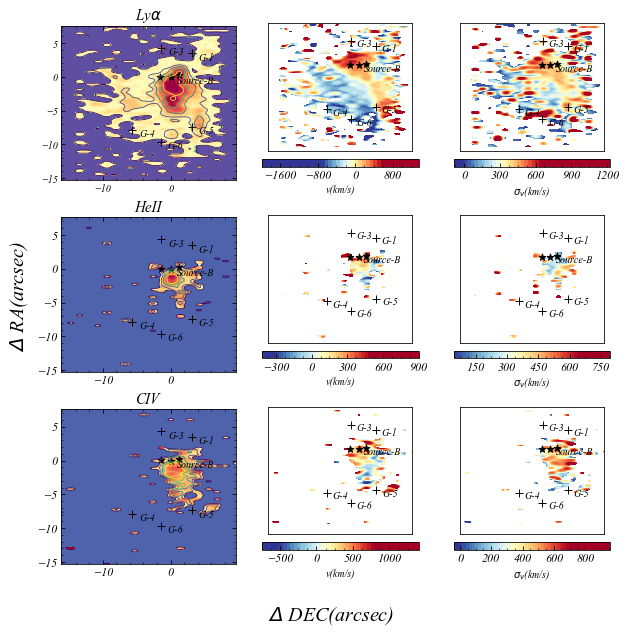

In [58]:
fig_dir='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/draft_code/paper/ApJtemplate/figs/'
fig,AX=plt.subplots(3,3)
AX=AX.flatten()
lymap=MAP(lydir,lynames,[3,11,19,31,43],
          lynorm,AX[:3],r'Ly$\alpha$',lysources,lysources_name)
heiimap=MAP(heiidir,heiinames,[2.5,4,6,8,10],
            heiinorm,AX[3:6],r'HeII',heiisources,heiisources_name)
civmap=MAP(civdir,civnames,[2.5,4,6,8,10],
           civnorm,AX[6:],r'CIV',civsources,civsources_name)
lymap.plot()
lymap.sourcesmark()
heiimap.plot()
heiimap.sourcesmark()
civmap.plot()
civmap.sourcesmark()
fig.text(0.5, 0.05, r'$\Delta$ DEC(arcsec)', ha='center', fontsize=20.)
fig.text(0.05, 0.5, r'$\Delta$ RA(arcsec)', va='center', rotation='vertical', fontsize=20.)
plt.subplots_adjust(wspace=.1)
plt.rcParams['figure.figsize'] = [10, 10]
# plt.savefig(fig_dir+'emissionmap.png',dpi=300)
plt.show()